# TensorFlow2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Conv1D, AveragePooling1D, Concatenate
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model

# 基本

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [3]:
model = Sequential([
    Flatten(input_shape=[28,28]), # 多次元から一次元に変換
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),    
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.weights

## コンパイル、Fit

In [6]:
model= Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()]
)

### ファッションデータのロード

In [7]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()
train_images.shape

(60000, 28, 28)

In [8]:
labels = [
	'T-shirt/top',
	'Trouser',
	'Pullover',
	'Dress',
	'Coat',
	'Sandal',
	'Shirt',
	'Sneaker',
	'Bag',
	'Ankle boot'
]
print(train_labels[0])

9


In [9]:
train_images = train_images / 255
test_images = test_images / 255

### イメージ表示

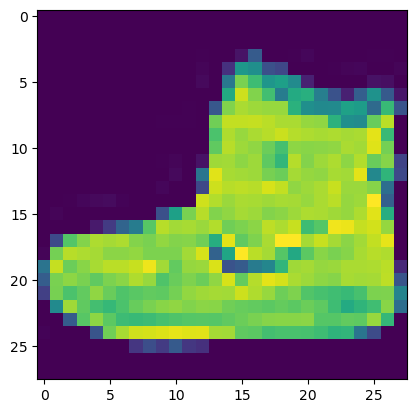

label: Ankle boot


In [10]:
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')

### フィット

In [11]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.5763 - sparse_categorical_accuracy: 0.7948 - mean_absolute_error: 4.4200
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.3777 - sparse_categorical_accuracy: 0.8674 - mean_absolute_error: 4.4200
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.8804 - mean_absolute_error: 4.4200
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.3238 - sparse_categorical_accuracy: 0.8861 - mean_absolute_error: 4.4200
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.3081 - sparse_categorical_accuracy: 0.8893 - mean_absolute_error: 4.4200


### トレーニングとテストのデータ分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

### トレーニングとテストを同時に渡す方法１

In [ ]:
history = model.fit(inputs, targets, validation_split=0.2)

### トレーニングとテストを同時に渡す方法２

In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels))

### ヒストリー

In [ ]:
df = pd.DataFrame(history.history)
df.head()

### プロット

In [ ]:
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

### 評価

In [ ]:
loss, acc = model.evaluate(test_images, test_labels)

### 予測

In [ ]:
predictions = model.predict(test_images[5][np.newaxis,...,np.newaxis])
print(predictions)
print(labels[np.argmax(predictions)])

### weight初期値いろいろ

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

import tensorflow.keras.backend as K
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)
model.add(Dense(64, kernel_initializer=my_init))

### アクティベーション関数

In [ ]:
y_true = tf.constant([0.0,1.0,1.0])
y_pred = tf.constant([0.4,0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
print(accuracy)

y_true = tf.constant([[0.0,1.0],[1.0,0.0],[1.0,0.0],[0.0,1.0]])
y_pred = tf.constant([[0.4,0.6], [0.3,0.7], [0.05,0.95],[0.33,0.67]])
accuracy =K.mean(K.equal(y_true, K.round(y_pred)))
print(accuracy)

### ワンホットエンコーディング

In [ ]:
labels = [0, 1, 5, 8, 10, 9, 1, 3, 4, 2, 6, 7]
onehot = tf.keras.utils.to_categorical(labels)
print(onehot)

# 畳み込み

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

### モデル定義

In [ ]:
model = Sequential([
    # 畳み込みレイヤー。フィルター数16、畳み込みカーネルの形状：(3,3)
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPoolingレイヤー。プーリングウィンドウサイズ：(3,3)
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### kernel_size, pool_size

In [ ]:
model = Sequential([
    # 次元のサイズが同じ場合は、kernel_size, pool_size で記述できる。
    Conv2D(16, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    # 次元のサイズが同じ場合は、kernel_size, pool_size で記述できる。
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### パディング、ストライド

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), padding='SAME', strides=2, activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### チャンネルの順序

In [ ]:
model = Sequential([
    # channels_lastの場合、(バッチサイズ, 高さ, 幅, チャンネル数)となる。
    # channels_firstの場合、(バッチサイズ, チャンネル数, 高さ, 幅)となる。
    Conv2D(16, (3, 3),activation='relu', input_shape=(32, 32, 3), data_format='channels_last'),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

# 正則化

In [ ]:
# 重み行列をカーネルともいう
# L1
model = Sequential([
    Dense(64, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l1(0.005)),
    Dense(1, activation='sigmoid')
])
# L2
model = Sequential([
    Dense(64, activation='relu',
          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])
# 両方、かつバイアス正則化
model = Sequential([
    Dense(64, activation='relu',
          # 減衰係数：0.001
          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005, l2=0.001),
          bias_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])
# L2正則化は安定性を高め、L1正則化は特徴選択の役割を果たす

## ドロップアウト

In [ ]:
model = Sequential([
    Dense(64, activation='relu'),
    # 前後のレイヤーの接続は0.5の確率でゼロに設定される
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# トレーニング時はランダムにドロップアウトされる
# fit() はトレーニングモード、evaluate(), predict() はテストモードで自動的に処理される

## バッチ正則化

In [ ]:
model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
])

### バッチ正則化のカスタマイズ

In [ ]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

# コールバック

### トレーニング用

In [ ]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_train_begin(self, logs=None):
        print('train start')

    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))

history = model.fit(X_train, y_train, epochs=5, callbacks=[my_callbacks()])

### テスト用

In [ ]:
class testing_callback(Callback):
    def on_test_begin(self, logs=None):
        pass

    def on_test_batch_begin(self, batch, logs=None):
        pass

    def on_test_end(self, epoch, logs=None):
        pass

model.evaluate(X_test, y_test, epochs=5, verbose=False, callbacks=[testing_callbacks()])

※predict用もあるが、同様なので省略。

### エポックの経過で学習率を変化させるコールバック

In [ ]:
lr_schedule = [
    (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # Add the new learning rate function to our callback
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # Get the current learning rate
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        # Call the auxillary function to get the scheduled learning rate for the current epoch
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # Set the learning rate to the scheduled learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))


### 早期打ち切り

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accurracy', patience=5, min_delta=0.01, mode='max')
model.fit(x, y, epochs=100, validation_split=0.15, batch_size=64,
         callbacks=[early_stopping])

### ReduceLROnPlateauによる学習率自動調整

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ReduceLROnPlateau が学習率を自動的に調整する
def get_callbacks():
    early = EarlyStopping(patience=30, mode='min')
    reduce = ReduceLROnPlateau(factor=0.2, patience=20)
    return (early, reduce)

early_stopping, learning_rate_reduction = get_callbacks()
history = model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

print(learning_rate_reduction.patience)

# セーブとロード

## モデルの保存

### ウェイトのみ保存

In [ ]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10,)),
    Dense(1)
])
model.compile(...)
model.fit(X, y, epochs=10)

model.save_weights('my_model')

In [ ]:
# 復元時、モデルを構築しなおす必要がある
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10,)),
    Dense(1)
])
model.compile(...)

new_model = model.load_weights('my_model')

### すべて保存

In [ ]:
model.save('my_model')

In [ ]:
# 復元するときは、モデルを構築しなおす必要が無い
new_model = load_model('my_model')

## チェックポイント

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10,)),
    Dense(1)
])
checkpoint = ModelCheckpoint('my_model', save_weights_only=True)
model.fit(X, y, epochs=10, callbacks=[checkpoint])

上記の場合、3つのファイルが生成される  
checkopint  ・・・実際のモデルがどこに保存されているかを示すメタデータ  
my_model.index  ・・・どのウェイトがどこに保存されているかを示す（分散環境で）  
my_model.data-00000-of-00001  ・・・実際のウェイトが保存されている  

In [ ]:
# Keras H5形式で保存
# ただし、一般的にはネイティブのTensorFlow形式を推奨
checkpoint = ModelCheckpoint('keras_model.h5', save_weights_only=True)

keras_model.h5　　・・・HDF5ファイル（ウェイトのみ）

In [ ]:
# ウェイト以外も保存する
checkpoint = ModelCheckpoint('my_model', save_weights_only=False)

この場合、サブディレクトリの下に次のファイルが生成される  
my_model/assets/  ・・・グラフで使用されるファイルが保存されるサブディレクトリ  
my_model/saved_model.pb  ・・・TensorFlowグラフ自体（モデルアーキテクチャ）を保存  
my_model/variables/variables.data-00000-of-00001  ・・・ウェイト  
my_model/variables/variables.index  ・・・ウェイトの場所  

In [ ]:
# H5でウェイト以外も
checkpoint = ModelCheckpoint('keras_model.h5', save_weights_only=False)

keras_model.h5　　・・・HDF5ファイル（アーキテクチャ全体が含まれる）

### チェックポイントの復元

In [ ]:
# モデルは再構築しておく必要がある
model.load_weights('my_model')

### チェックポイントの設定

In [ ]:
# 保存頻度（デフォルトはエポック毎）
# 最後に重みを保存してからモデルが見たサンプル数で指定
checkpoint = ModelCheckpoint('training_run_1/my_model', save_weights_only=True,
                            save_freq=1000)

# パフォーマンス測定基準に従ってのみ保存
# 下記の場合、検証損失がトレーニング実行で最高の値になった場合のみ保存する
checkpoint = ModelCheckpoint('training_run_1/my_model', save_weights_only=True,
                            save_best_only=True, monitor='val_loss', mode='min')

# ログディクショナリにあるどんなキーでもフォーマット可能（上書きを防げる）
checkpoint = ModelCheckpoint('training_run_1/my_model.{epoch}.{batch}',
                             save_weights_only=True, save_freq=1000)
checkpoint = ModelCheckpoint('training_run_2/my_model.{epoch}-{val_loss.4f}',
                             save_weights_only=True, save_freq=1000)

## モデルアーキテクチャのみ保存

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential([
    Dense(units=32, input_shape=(32, 32, 3), activation='relu', name='dense_1'),
    Dense(units=10, activation='softmax', name='dense_2')
])

config_dict = model.get_config()
print(config_dict)

model_same_config = tf.keras.Sequential.from_config(config_dict)

# アーキテクチャは同じ
print('Same config:', model.get_config() == model_same_config.get_config())
# ウェイトは異なる
print('Same value for first weight matrix:', np.allclose(model.weights[0].numpy(), model_same_config.weights[0].numpy()))

## 保存形式

### JSON

In [ ]:
import json

# JSONで保存。（ウェイトは含まれない）
json_string = model.to_json()
with open('config.json', 'w') as f:
    json.dump(json_string, f)
del json_string

with open('config.json', 'r') as f:
    json_string = json.load(f)
model_same_config = tf.keras.models.model_from_json(json_string)

### YAML

In [ ]:
yaml_string = model.to_yaml()
print(yaml_string)

# 事前学習されたKerasモデルのロード

## Keras Applications

https://keras.io/ja/applications/

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

# imagenetデータセットで学習したモデルが、
# ~/.keras/models にウェイト付きでダウンロードされる
model = ResNet50(weights='imagenet')

# 全結合層を含まずにダウンロードされる
# 転移学習アプリケーションなどに使用できるヘッドモデル
model = ResNet50(weights='imagenet', include_top=False)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

model = ResNet50(weights='imagenet')

# ResNet50に必要なサイズである224x224に、自動的に変換される
img_input = image.load_img('my_picture.jpg', target_size=(224, 224))
img_input = image.img_to_array(img_input)
img_input = preprocess_input(img_input[np.newaxis, ...])

preds = model.predict(img_input)
decoded_predictions = decode_predictions(preds, top=3)[0]
# List of (class, description, probability)

## TensorFlow Hub

https://www.tensorflow.org/hub?hl=ja

In [ ]:
時間かかるので不用意に実行しない。
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

# 関数API

In [ ]:
inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation='relu')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12,)) # 補助入力
h = Concatenate()([h, aux_inputs])
outputs = Dense(20, activation='sigmoid')(h)
aux_outputs = Dense(1, activation='linear')(h) # 補助出力

model = Model(inputs=[inputs, aux_inputs], outputs=[outputs, aux_outputs])

# 損失関数はoutputsと同じ順で２つ指定する
# binary_crossentropy + 0.4 * mse が最終的な損失になる
model.compile(loss=['binary_crossentropy', 'mse'], loss_weights=[1, 0.4], metrics=['accuracy'])

history = model.fit([X_train, X_aux], [y_train, y_aux], validation_split=0.2, epochs=20)

### モデルを視覚化する

In [ ]:
inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation='relu')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12,)) # 補助入力
h = Concatenate()([h, aux_inputs])
outputs = Dense(20, activation='sigmoid')(h)
aux_outputs = Dense(1, activation='linear')(h) # 補助出力

model = Model(inputs=[inputs, aux_inputs], outputs=[outputs, aux_outputs])

plot_model(model, 'multi_input_output_model.png', show_shapes=True)

### 変数

In [ ]:
my_var = tf.Variable([-1, 2], dtype=tf.float32) # 変数の初期値
print(my_var)
my_var.assign([3.5, -1.])
print(my_var)

x = my_var.numpy() # numpyに変換
print(x)

### テンソル

In [ ]:
x = tf.ones(shape=(2, 1))
print(x)
y = tf.zeros(shape=(2, 1))
print(y)

In [ ]:
t= tf.constant(np.arange(24), shape=(3, 2, 4))
print(t)
t1 = tf.expand_dims(t, 0)
print(t1)
t2 = tf.expand_dims(t, 1)
print(t2)
t3 = tf.expand_dims(t, 2)
print(t3)

print(tf.squeeze(t1))

In [ ]:
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 2.0], [0.0, 1.0]])

cd_mutmul = tf.matmul(c, d) # 行列の掛け算
print(cd_mutmul)

cd_x = c * d # 各要素の掛け算
print(cd_x)

### レイヤー変数

In [ ]:
inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation='relu', name='conv1d_layer')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12,)) # 補助入力
h = Concatenate()([h, aux_inputs])
outputs = Dense(20, activation='sigmoid')(h)
aux_outputs = Dense(1, activation='linear')(h) # 補助出力

model = Model(inputs=[inputs, aux_inputs], outputs=[outputs, aux_outputs])

model.layers # 全レイヤー

In [ ]:
print(model.layers[1].weights) # 特定のレイヤーのウェイト（TensorFlow変数）

In [ ]:
print(model.layers[1].get_weights()) # 単なる数値として取得

In [ ]:
print(model.layers[1].kernel) # カーネル

In [ ]:
print(model.layers[1].bias) # バイアス

In [ ]:
print(model.get_layer('conv1d_layer').bias) # レイヤー名で参照

In [ ]:
# 入出力テンソル
print(model.get_layer('conv1d_layer').input)
print(model.get_layer('conv1d_layer').output)

In [ ]:
inputs = Input(shape=(32, 1))
h = Conv1D(16, 5, activation='relu', name='conv1d_layer')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten(name='flatten_layer')(h)
outputs = Dense(20, activation='sigmoid')(h)

model = Model(inputs=inputs, outputs=outputs)

flatten_output = model.get_layer('flatten_layer').output

model2 = Model(inputs=model.input, outputs=flatten_output)

# 最後のDense層だけ入れ替えた形
model3  = Sequential([
    model2,
    Dense(10, activation='softmax', name='new_dense_layer')
])

### フリーズ

In [ ]:
# レイヤーをフリーズ
model.get_layer('conv2d_layer').trainable = False
model.compile(...)

# モデルをフリーズ
model.trainable = False

# データセット

### ランダム

In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([256, 4], minval=1, maxval=10, dtype=tf.int32),
     tf.random.normal([256]))
)
print(dataset.element_spec)

## CIFAR100

In [ ]:
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
plt.imshow(x_train[100])
print(y_train[100])

## ジェネレーター

In [ ]:
model = Sequential(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

# datagen は yield でイテレーションのデータを返すデータセット
# エポック当たりのステップ数を指定する必要がある
model.fit_generator(datagen, steps_per_epoch=1000, epochs=10)

model.evaluate_generator(datagen_eval, staps=100)

model.predict_generator(datagen_test, steps=100)

In [ ]:
img_datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True)
dataset = tf.data.Dataset.from_generator(img_datagen.flow, args=[x_train, y_train],
                                        output_types=(tf.float32, tf.int32),
                                        output_shapes=([32, 32, 32, 3], [32, 1]))

## オーグメンテーション

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

image_data_gen = ImageDataGenerator(rescale=1/255., # 範囲を0から1の間にする
                                    horizontal_flip=True, # 上下反転して複製
                                    height_shift_range=0.1, # 画像の高さの20％の幅でランダムに上下シフト
                                    fill_mode='nearest', # 足りないピクセルの埋め方（デフォルト）
                                    featurewise_center=True # データセット全体における個々の特徴の平均が0になるよう標準化
                                   )

image_data_gen.fit(x_train)

train_datagen = image_data_gen.flow(x_train, y_train, batch_size=16)

model.fit_generator(train_datagen, epochs=20)

In [ ]:
def monochrome(x):
    def func_bv(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bv, -1, x)
    return x

image_generator = ImageDataGenerator(
                                    preprocessing_function=monochrome,
                                    rotation_range=180,
                                    rescale=1/255.
                                   )

## データセット作成

In [ ]:
def create_dataset(data, labels):
    return tf.data.Dataset.from_tensor_slices((data, labels))

train_dataset = create_dataset(train_data, train_labels)
test_dataset = create_dataset(test_data, test_labels)

print(train_dataset.element_spec)
print(test_dataset.element_spec)

## フィルター

In [ ]:
def filter_classes(dataset, classes):
    def filter_func(image, label):
        return tf.math.reduce_any(tf.equal(label, classes))
    return  dataset.filter(filter_func)

cifar_classes = [0, 29, 99] # Your datasets should contain only classes in this list
train_dataset = filter_classes(train_dataset, cifar_classes)

## ラベルのマッピング

In [ ]:
# ラベルをワンホットエンコーディングに変換している
def map_labels(dataset):
    def one_hot_encode_label(image, label):
        num_classes = 3  # クラス数
        one_hot_label = tf.one_hot(label, num_classes, on_value=1.0, off_value=0.0)
        return image, one_hot_label

    return dataset.map(one_hot_encode_label)

train_dataset = map_labels(train_dataset)
test_dataset = map_labels(test_dataset)

In [ ]:
# ラベルとエンコーディングの順序を保証する形
def map_labels2(dataset):
    def one_hot_encode_label(image, label):
        encoded_label = tf.zeros(3)
        if label == 0:
            encoded_label = tf.tensor_scatter_nd_update(encoded_label, [[0]], [1.0])
        elif label == 29:
            encoded_label = tf.tensor_scatter_nd_update(encoded_label, [[1]], [1.0])
        elif label == 99:
            encoded_label = tf.tensor_scatter_nd_update(encoded_label, [[2]], [1.0])
        return image, encoded_label

    return dataset.map(one_hot_encode_label)    

## 時系列ジェネレーター

### 動作例

In [ ]:
import numpy as np

dummy_data = np.arange(1, 11, 1)
dummy_targets = np.arange(10, 110, 10)
print(dummy_data)
print(dummy_targets)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, 4)

print('Length:', len(timeseries_gen))
inputs, outputs = timeseries_gen[0]
print("\nData:")
print(inputs)
print("Targets:")
print(outputs)

### バッチサイズ

In [ ]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, batch_size=2)
timeseries_iterator = iter(timeseries_gen)
next(timeseries_iterator)

### ストライド

In [ ]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, stride=2, batch_size=1)
timeseries_iterator = iter(timeseries_gen)

while True:
    try:
        print(next(timeseries_iterator))
    except StopIteration:
        break

### リバース

In [ ]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, stride=1, batch_size=1, reverse=True)
timeseries_iterator = iter(timeseries_gen)

while True:
    try:
        print(next(timeseries_iterator))
    except StopIteration:
        break

### オーディオ

In [ ]:
from scipy.io.wavfile import read, write

rate, song = read("data/055 - Angels In Amplifiers - I'm Alright/mixture.wav")
print("rate:", rate)
song = np.array(song)
print("song.shape:", song.shape)

In [ ]:
timeseries_gen = TimeseriesGenerator(song, targets=song, length=200000, stride=200000, batch_size=1)
timeseries_iterator = iter(timeseries_gen)

for i in range(3):
    sample, target = next(timeseries_iterator)
    write('example.wav', rate, sample[0])
    print('Sample {}'.format(i+1))
    ipd.display(ipd.Audio("example.wav"))

# シーケンシャルデータ

## パディング

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_input = [
    [4, 12, 33, 18],
    [63, 23, 54, 30, 19, 3],
    [43, 37, 11, 33, 15]
]

preprocessed_data = pad_sequences(test_input, padding='pre') # リストのリストを渡す
print(preprocessed_data)

[[ 0  0  4 12 33 18]  
 [63 23 54 30 19  3]  
 [ 0 43 37 11 33 15]]  

In [ ]:
# 最大長指定（前を切り捨て）
preprocessed_data = pad_sequences(test_input, padding='post', maxlen=5)
print(preprocessed_data)

[[ 4 12 33 18  0]  
 [23 54 30 19  3]  
 [43 37 11 33 15]]  

In [ ]:
# 最大長指定（後を切り捨て）
preprocessed_data = pad_sequences(test_input, padding='post', maxlen=5, truncating='post')
print(preprocessed_data)

[[ 4 12 33 18  0]  
 [63 23 54 30 19]  
 [43 37 11 33 15]]  

In [ ]:
# パディング値を指定
preprocessed_data = pad_sequences(test_input, value=-1)
print(preprocessed_data)

[[-1 -1  4 12 33 18]  
 [63 23 54 30 19  3]  
 [-1 43 37 11 33 15]]  

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Masking
import numpy as np

test_input = [
    [4, 12, 33, 18],
    [63, 23, 54, 30, 19, 3],
    [43, 37, 11, 33, 15]
]

preprocessed_data = pad_sequences(test_input, padding='post')

masking_layer = Masking(mask_value=0)
preprocessed_data = preprocessed_data[..., np.newaxis] # (batch_size, seq_length, features)
masked_input = masking_layer(preprocessed_data)
print(masked_input)

[[[ 4]
  [12]
  [33]
  [18]
  [ 0]
  [ 0]],  
 [[63]
  [23]
  [54]
  [30]
  [19]
  [ 3]],  
 [[43]
  [37]
  [11]
  [33]
  [15]
  [ 0]]]

In [ ]:
masked_input._keras_mask

<tf.Tensor: shape=(3, 6), dtype=bool, numpy=  
array([[ True,  True,  True,  True, False, False],  
       [ True,  True,  True,  True,  True,  True],  
       [ True,  True,  True,  True,  True, False]])>  

## 埋め込み層

In [ ]:
from tensorflow.keras.layers import Embedding
import numpy as np

# 1000個の異なるトークンを32次元の浮動小数点ベクトルに埋め込む
embedding_layer = Embedding(1000, 32, input_length=64)
# 16個のシーケンスで各シーケンスは64個の整数で構成。値は0から999までの範囲。
test_input = np.random.randint(1000, size=(16, 64))

# 埋め込み層をテストデータに適用し、元の整数シーケンスを32次元浮動小数点ベクトルに変換
embedded_inputs = embedding_layer(test_input) # (16, 64, 32)
print(embedded_inputs)
#embedded_inputs._keras_mask

## 再帰ニューラルネットワーク

### シンプルRNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    # 入力：シーケンス長64、整数トークンの範囲は0から999
    Embedding(1000, 32, input_length=64), # (None, 64, 32)
    SimpleRNN(64, activation='tanh'),     # (None, 64)
    Dense(5, activation='softmax')        # (None, 5)
])

In [ ]:
# 任意のシーケンス長
model = Sequential([
    # 入力：シーケンス長任意、整数トークンの範囲は0から999
    Embedding(1000, 32),                  # (None, None, 32)
    SimpleRNN(64, activation='tanh'),     # (None, 64)
    Dense(5, activation='softmax')        # (None, 5)
])

### LSTM（長・短期記憶）

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model = Sequential([
    # 入力：シーケンス長任意、整数トークンの範囲は0から999
    Embedding(1000, 32),                  # (None, None, 32)
    LSTM(64, activation='tanh'),          # (None, 64)
    Dense(5, activation='softmax')        # (None, 5)
])

### GRU（ゲート付き反復単位）

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
model = Sequential([
    # 入力：シーケンス長任意、整数トークンの範囲は0から999
    Embedding(1000, 32),                  # (None, None, 32)
    GRU(64, activation='tanh'),           # (None, 64)
    Dense(5, activation='softmax')        # (None, 5)
])

## スタック

### LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Masking, LSTM, Dense, Input

inputs = Input(shape=(None, 10))            # (None, None, 10)
h = Masking(mask_value=0)(inputs)           # (None, None, 10)
# タイムステップごとに出力を返す
h = LSTM(32, return_sequences=True)(h)      # (None, None, 32) 
h = LSTM(64)(h)                             # (None, 64)
outputs = Dense(5, activation='softmax')(h) # (None, 5)

model = Model(inputs, outputs)

### 双方向

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Masking, LSTM, Dense, Input, Bidirectional

# 過去だけでなく未来のコンテキストも考慮したいとき、Bidirectionalが使える
inputs = Input(shape=(None, 10))                          # (None, None, 10)
h = Masking(mask_value=0)(inputs)                          # (None, None, 10)
h = Bidirectional(LSTM(32, return_sequences=True))(h)      # (None, None, 64) 
h = Bidirectional(LSTM(64))(h)                             # (None, 128) 
outputs = Dense(5, activation='softmax')(h)                # (None, 5)

model = Model(inputs, outputs)

# カスタムモデル

## モデルサブクラス

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout

class MyModel(Model):
    def __init__(self, num_classes, **kargs):
        super(MyModel, self).__init__(**kargs)
        self.dense1 = Dense(16, activation='sigmoid')
        self.dropout = Dropout(0.5)
        self.dense2 = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        h = self.dense1(inputs)
        h = self.dropout(h, training=training)
        return self.dense2(h)

my_model = MyModel(10, name='my_model')
my_model(tf.random.uniform([1, 10]))
my_model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(10)
        self.dense3 = Dense(5)
        self.softmax = Softmax()

    def call(self, inputs):
        x = self.dense1(inputs)
        y1 = self.dense2(inputs)
        y2 = self.dense3(y1)
        concat = concatenate([x,y2])
        return self.softmax(concat)

my_model = MyModel()
my_model(tf.random.uniform([1, 10]))
my_model.summary()


## カスタムレイヤー

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class LinearMap(Layer):
    def __init__(self, input_dim, units):
        super(LinearMap, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units)))
 
    def call(self, inputs):
        return tf.matmul(inputs, self.w)

linear_layer = LinearMap(3, 2)
print(linear_layer.weights)

inputs = tf.ones((1, 3))
print(linear_layer(inputs))

In [ ]:
# カスタムレイヤーを使ったカスタムモデル
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout

class MyModel(Model):
    def __init__(self, hidden_units, outputs, **kargs):
        super(MyModel, self).__init__(**kargs)
        self.dense1 = Dense(hidden_units, activation='sigmoid')
        self.linear = LinearMap(hidden_units, outputs)

    def call(self, inputs):
        h = self.dense1(inputs)
        return self.linear(h)

my_model = MyModel(64, 12, name='my_model')
my_model(tf.random.uniform([1, 10]))
my_model.summary()

## 自動微分

In [ ]:
import tensorflow as tf

x = tf.constant(2.0)

with tf.GradientTape() as tape:
    tape.watch(x) # 以降のxに対する操作が記録される
    y = x**2
    grad = tape.gradient(y, x) # xに関して微分したいテンソルを渡し、結果をテンソルgradに格納

print(grad)

In [ ]:
import tensorflow as tf

x = tf.constant([0, 1, 2, 3], dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.reduce_sum(x**2)
    z = tf.math.sin(y)
    dz_dy = tape.gradient(z, y)

print(dz_dy)

In [ ]:
import tensorflow as tf

x = tf.constant([0, 1, 2, 3], dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.reduce_sum(x**2)
    z = tf.math.sin(y)
    dz_dy, dz_dx = tape.gradient(z, [y, x])

print(dz_dy)
print(dz_dx)

## カスタムトレーニングループ

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD

my_model = MyModel()
loss = MeanSquaredError()
optimizer = SGD(learning_rate=0.05, momentum=0.9)

epoch_losses = []

for epoch in range(num_epochs):
    batch_losses = []
    
    for inputs, outputs in training_dataset:
        with tf.GradientTape() as tape:
            # tape.watch() を実行していない理由は、
            # TensorFlow変数オブジェクトを使用する計算がコンテキストによって自動的に記録されるから。
            current_loss = loss(my_model(inputs), outputs)
            grads = tape.gradient(current_loss, my_model.trainable_variables)
    
        batch_losses.append(current_loss)
        optimizer.apply_gradients(zip(grads, my_model.trainable_variables))

    epoch_losses.append(np.mean(batch_losses))


## tf.function デコレータ

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD

my_model = MyModel()
loss = MeanSquaredError()
optimizer = SGD(learning_rate=0.05, momentum=0.9)

# この関数からグラフが作成されるので、多くの場合、高速に実行される
@tf.function
def get_loss_and_graph(inputs, outputs):
    with tf.GradientTape() as tape:
        current_loss = loss(my_model(inputs), outputs)
        grads = tape.gradient(current_loss, my_model.trainable_variables)
    return current_loss, grads

current_loss, grads = get_loss_and_grads(inputs, outputs)
optimizer.apply_gradients(zip(grads, my_model.trainable_variables))


# TensorFlow Probability（TFP 確率的レイヤー）

## 分布

### 一変量分布

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print('正規分布')
normal = tfd.Normal(loc=0., scale=1.) # 平均値、標準偏差
print(normal)
print(normal.sample(3)) # ランダムに3サンプルを生成
print(normal.prob(0.5)) # 特定の値の確率密度
print(normal.log_prob(0.5)) # 特定の値の確率密度の自然対数

print('ベルヌーイ（離散型分布）')
bernoulli = tfd.Bernoulli(probs=0.7) # 0と1のうち、1が発生する確率
bernoulli = tfd.Bernoulli(logits=0.847) # 対数オッズで指定する方法（確率0.7と同じ）
print(bernoulli)
print(bernoulli.sample(10))
print(bernoulli.prob(1))
print(bernoulli.log_prob(1)) # 0.7の対数

print('バッチ')
batched_bernoulli = tfd.Bernoulli(probs=[0.4, 0.5]) # 1つのオブジェクトに複数の確率分布を作成
print(batched_bernoulli)
print(batched_bernoulli.sample(3))
print(batched_bernoulli.prob([1, 1]))
print(batched_bernoulli.log_prob([1, 1]))

In [ ]:
print('2Dバッチ')
probs = [[[0.5, 0.5],
         [0.8, 0.3],
         [0.25, 0.75]]]
batched_bernoulli_2d = tfd.Bernoulli(probs=probs)
print(batched_bernoulli_2d)
print(batched_bernoulli_2d.sample(3))

In [ ]:
# ヒストグラムプロット
plt.hist(normal.sample(10000), bins=50, density=True) # 棒の数、総和が1になるよう正規化
plt.show()

exponential = tfd.Exponential(rate=1)
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

### 多変量分布

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print('対角共分散行列を持つ多変量正規分布')
mv_normal = tfd.MultivariateNormalDiag(loc=[-1., 0.5], scale_diag=[1., 1.5]) # 平均、標準偏差
print(mv_normal) # batch_shape=[], event_shape=[2]
print(mv_normal.sample(3))
print(mv_normal.log_prob([-0.2, 1.8])) # まとめて1つの確率変数の値を表す

print('バッチとの違い')
batched_normal = tfd.Normal(loc=[-1., 0.5], scale=[1., 1.5])
print(batched_normal) # batch_shape=[2], event_shape=[]
print(batched_normal.sample(3))
print(batched_normal.log_prob([-0.2, 1.8])) # それぞれの確率変数の値を表す（合計すると多変量の値と等しい）

In [ ]:
# バッチ化された多変量分布
batched_mv_normal = tfd.MultivariateNormalDiag(
    loc = [[-1., 0.5], [2., 0.], [-0.5, 1.5]],
    scale_diag = [[1., 1.5], [2., 0.5], [1., 1.]]
)
print(batched_mv_normal) # batch_shape=[3], event_shape=[2]
print(batched_mv_normal.sample(2))

In [ ]:
# プロット
mv_normal = tfd.MultivariateNormalDiag(loc=[-1., 0.5], scale_diag=[1., 1.5])
plt_sample = mv_normal.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

### 独立分布

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

batched_normal = tfd.Normal(loc=[-1., 0.5], scale=[1., 1.5])
print(batched_normal)
print(batched_normal.log_prob([0.2, 1.8]))

# 二次元を独立した一次元に変換
independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1)
print(independent_normal)
print(independent_normal.log_prob([0.2, 1.8]))

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

batched_normal = tfd.Normal(
    loc = [[-1., 0.5], [0., 1.], [0.3, -0.1]],
    scale = [[1., 1.5], [0.2, 0.8], [2., 1.]]
)
print(batched_normal)

independent_normal = tfd.Independent(batched_normal, reinterpreted_batch_ndims=1)
print(independent_normal)

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

exp = tfd.Exponential(rate=[
    [[[1., 1.5, 0.8], [0.3, 0.4, 1.8]]],
    [[[0.2, 0.4, 1.4], [0.4, 1.1, 0.9]]]
])
print(exp)
ind_exp = tfd.Independent(exp, reinterpreted_batch_ndims=2)
print(ind_exp)
print(ind_exp.sample([4, 2]).shape)

print(ind_exp.log_prob(tf.random.uniform((5, 1, 1, 2, 1))).shape)


## ナイーブベイズ分類

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
%matplotlib inline

In [ ]:
# Irisデータセット
iris = datasets.load_iris()
data = iris.data[:, :2]
targets = iris.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, targets, test_size=0.2)

labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
label_colours = ['blue', 'orange', 'green']

def plot_data(x, y, labels, colours):
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx, 0], x[inx, 1], label=labels[c], c=colours[c])
    plt.title("Training set")
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.legend()
    
plt.figure(figsize=(8, 5))
plot_data(x_train, y_train, labels, label_colours)
plt.show()

### クラス事前分布

In [ ]:
# yデータから確率分布を生成する
def get_prior(y):
    unique_labels, label_counts = np.unique(y, return_counts=True)
    #print(unique_labels, label_counts) # [0 1 2] [40 43 37]
    class_probabilities = label_counts / len(y)
    #print(class_probabilities) # [0.33333333 0.35833333 0.30833333]
    return tfp.distributions.Categorical(probs=class_probabilities)    

In [ ]:
prior = get_prior(y_train)

labels = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']
plt.bar([0, 1, 2], prior.probs.numpy(), color=label_colours)
plt.xlabel("Class")
plt.ylabel("Prior probability")
plt.title("Class prior distribution")
plt.xticks([0, 1, 2], labels)
plt.show()

### クラス条件付き確率密度

In [ ]:
def get_class_conditionals(x, y):
    num_samples, num_features = x.shape
    num_classes = np.max(y) + 1

    # クラスごとの平均値、標準偏差を保持するリスト
    mean_tensors = []
    std_dev_tensors = []
    
    for class_label in range(num_classes):
        class_data = x[y == class_label] # 指定クラスのデータのみ抽出
        
        class_means = tf.reduce_mean(class_data, axis=0)
        class_std_devs = tf.math.reduce_std(class_data, axis=0)
        
        mean_tensors.append(class_means)
        std_dev_tensors.append(class_std_devs)
    
    class_means_tensor = tf.stack(mean_tensors)
    class_std_devs_tensor = tf.stack(std_dev_tensors)
    #print(class_means_tensor)
    #print(class_std_devs_tensor)
    
    class_conditionals_distribution = tfp.distributions.MultivariateNormalDiag(
        loc=class_means_tensor,
        scale_diag=class_std_devs_tensor,
    )
    #print(class_conditionals_distribution) # batch_shape=[3], event_shape=[2]
    return class_conditionals_distribution

In [ ]:
class_conditionals = get_class_conditionals(x_train, y_train)

In [ ]:
def get_meshgrid(x0_range, x1_range, num_points=100):
    x0 = np.linspace(x0_range[0], x0_range[1], num_points)
    x1 = np.linspace(x1_range[0], x1_range[1], num_points)
    return np.meshgrid(x0, x1)

def contour_plot(x0_range, x1_range, prob_fn, batch_shape, colours, levels=None, num_points=100):
    X0, X1 = get_meshgrid(x0_range, x1_range, num_points=num_points)
    Z = prob_fn(np.expand_dims(np.array([X0.ravel(), X1.ravel()]).T, 1))
    Z = np.array(Z).T.reshape(batch_shape, *X0.shape)
    for batch in np.arange(batch_shape):
        if levels:
            plt.contourf(X0, X1, Z[batch], alpha=0.2, colors=colours, levels=levels)
        else:
            plt.contour(X0, X1, Z[batch], colors=colours[batch], alpha=0.3)

plt.figure(figsize=(10, 6))
plot_data(x_train, y_train, labels, label_colours)
x0_min, x0_max = x_train[:, 0].min(), x_train[:, 0].max()
x1_min, x1_max = x_train[:, 1].min(), x_train[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), class_conditionals.prob, 3, label_colours)
plt.title("Training set with class-conditional density contours")
plt.show()

### 予測

In [ ]:
# クラス事前分布とクラス条件付き確率密度の和が最大となるクラスを求める
def predict_class(prior, class_conditionals, x):
    X = np.expand_dims(x, axis=(x.ndim - 1))
    cond_probs = class_conditionals.log_prob(X)
    prior_log = np.log(prior.probs)
    joint_likelihood = tf.add(cond_probs, prior_log)
    #print(joint_likelihood)
    return np.argmax(joint_likelihood, axis=-1)


In [ ]:
predictions = predict_class(prior, class_conditionals, x_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy: {:.4f}".format(accuracy))

In [ ]:
plt.figure(figsize=(10, 6))
plot_data(x_train, y_train, labels, label_colours)
x0_min, x0_max = x_train[:, 0].min(), x_train[:, 0].max()
x1_min, x1_max = x_train[:, 1].min(), x_train[:, 1].max()
# 等高線プロット
contour_plot((x0_min, x0_max), (x1_min, x1_max), 
             lambda x: predict_class(prior, class_conditionals, x), 
             1, label_colours, levels=[-0.5, 0.5, 1.5, 2.5],
             num_points=500)
plt.title("Training set with decision regions")
plt.show()

### バイナリ分類

In [ ]:
# 3クラスだったデータを2クラスに変更している
y_train_binary = np.array(y_train)
y_train_binary[np.where(y_train_binary == 2)] = 1

y_test_binary = np.array(y_test)
y_test_binary[np.where(y_test_binary == 2)] = 1

In [ ]:
labels_binary = {0: 'Iris-Setosa', 1: 'Iris-Versicolour / Iris-Virginica'}
label_colours_binary = ['blue', 'red']

plt.figure(figsize=(8, 5))
plot_data(x_train, y_train_binary, labels_binary, label_colours_binary)
plt.show()

In [ ]:
# クラス事前分布
prior_binary = get_prior(y_train_binary)

In [ ]:
plt.bar([0, 1], prior_binary.probs.numpy(), color=label_colours_binary)
plt.xlabel("Class")
plt.ylabel("Prior probability")
plt.title("Class prior distribution")
plt.xticks([0, 1], labels_binary)
plt.show()

In [ ]:
def learn_stdevs(x, y, scales, optimiser, epochs):
    shape = (len(set(y)), x.shape[-1])
    loc = np.zeros(shape, dtype=np.float32)

    for feature in range(shape[0]):
        for category in range(shape[-1]):
            data_point = x[y == category][:, feature]
            loc[category, feature] = np.mean(data_point)

    distribution = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scales)

    x_new = x.astype('float32')
    x_new = np.expand_dims(x_new, 1)

    # 負の対数尤度関数
    def nll(x, y, distribution):
        predictions = - distribution.log_prob(x)
        p1 = tf.reduce_sum(predictions[y==0][:,0])
        p2 = tf.reduce_sum(predictions[y==1][:,1])
        return p1 + p2

    @tf.function
    def get_loss_and_grads(x, y, distribution):
        with tf.GradientTape() as tape:
            tape.watch(distribution.trainable_variables)
            loss = nll(x, y, distribution)
            grads = tape.gradient(loss, distribution.trainable_variables)
        return loss, grads

    train_loss_results = []
    train_scale_results = []

    for epoch in range(epochs):
        if epoch % 100 == 0:
            print(f'epoch: {epoch}')
        loss, grads = get_loss_and_grads(x_new, y, distribution)
        optimiser.apply_gradients(zip(grads, distribution.trainable_variables))
        scales = distribution.parameters['scale_diag'].numpy()
        train_loss_results.append(loss)
        train_scale_results.append(scales)

    return np.array(train_loss_results), np.array(train_scale_results), distribution

In [ ]:
scales = tf.Variable([1., 1.])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
epochs = 500

nlls, scales_arr, class_conditionals_binary = learn_stdevs(x_train, y_train_binary, scales, opt, epochs)

In [ ]:
print("Class conditional means:")
print(class_conditionals_binary.loc.numpy())
print("\nClass conditional standard deviations:")
print(class_conditionals_binary.stddev().numpy())

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(nlls)
ax[0].set_title("Loss vs epoch")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Average negative log-likelihood")
for k in [0, 1]:
    ax[1].plot(scales_arr[:, k], color=label_colours_binary[k], label=labels_binary[k])
ax[1].set_title("Standard deviation ML estimates vs epoch")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Standard deviation")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plot_data(x_train, y_train_binary, labels_binary, label_colours_binary)
x0_min, x0_max = x_train[:, 0].min(), x_train[:, 0].max()
x1_min, x1_max = x_train[:, 1].min(), x_train[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), class_conditionals_binary.prob, 2, label_colours_binary)
plt.title("Training set with class-conditional density contours")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plot_data(x_train, y_train_binary, labels_binary, label_colours_binary)
x0_min, x0_max = x_train[:, 0].min(), x_train[:, 0].max()
x1_min, x1_max = x_train[:, 1].min(), x_train[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), 
             lambda x: predict_class(prior_binary, class_conditionals_binary, x), 
             1, label_colours_binary, levels=[-0.5, 0.5, 1.5],
             num_points=500)
plt.title("Training set with decision regions")
plt.show()

## DistributionLambda レイヤー

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

model = Sequential([
    Dense(1, input_shape=(2,)),
    tfpl.DistributionLambda(
        lambda t: tfd.Normal(loc=t, scale=1)
    )
])

def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model.comile(loss=nll, optimizer='rmsprop')
model.fit(x_train, y_train, epochs=10)

model(x_test).sample()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

model = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    Dense(2),
    tfpl.IndependentNormal(1)
])

model.comile(loss=lambda y_true, ypred: -y_pred.log_prob(y_true))
model.fit(x_train, y_train, epochs=200)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    return lambda t: tfd.Independent(tfd.Normal(loc=tf.zeros(n, dtype=dtype), scale=1),
                                    reinterpreted_batch_ndims=1)

def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    return Sequential([
        tfpl.VariableLayer(tfpl.IndependentNormal.params_size(n), dtype=dtype),
        tfpl.IndependentNormal(n, convert_to_tensor_fn=tfd.Distribution.sample)
    ])

# Nはデータセットのサイズ
model = Sequential([
    tfpl.DenseVariational(16, posterior, prior, kl_weight=1/N,
                         activation='relu', input_shape=(8,)),
    tfpl.DenseVariational(2, posterior, prior, kl_weight=1/N),
    tfpl.IndependentNormal(1)
])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

model = Sequential([
    tfpl.Convolution2DReparameterization(16, [3, 3],
                    activation='relu', input_shape=(28, 28, 1),
                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(),
                    kernel_prior_fn=tfpl.default_multivariate_normal_fn),
    MaxPool2D(3),
    Flatten(),
    tfpl.DenseReparameterization(tfpl.OneHotCategorical.params_size(10)),
    tfpl.OneHotCategorical(10)
])


# バイジェクターと正規化フロー

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

z = tf.constant([1., 2., 3.])

scale = tfb.Scale(2.)

x = scale.forward(z)
print(x)

y = scale.inverse(tf.constant([5., 3., 1.]))
print(y)

tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)
tf.Tensor([2.5 1.5 0.5], shape=(3,), dtype=float32)


### チェイン

In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

z = tf.constant([1., 2., 3.])

scale = tfb.Scale(2.)
shift = tfb.Shift(1.)

scale_and_shift = tfb.Chain([shift, scale]) # リストとは逆順に適用されることに注意
# scale_and_shift = shift(scale) # こういう書き方もある

y1 = scale_and_shift.forward(z)
print(y1)

y2 = scale_and_shift.inverse(tf.constant([2., 5., 8.]))
print(y2)

tf.Tensor([3. 5. 7.], shape=(3,), dtype=float32)
tf.Tensor([0.5 2.  3.5], shape=(3,), dtype=float32)


In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

normal = tfd.Normal(loc=0., scale=1.)

z = normal.sample(3)
print(z)

scale_and_shift = tfb.Chain([tfb.Shift(1.), tfb.Scale(2.)])

x = scale_and_shift.forward(z)
print(x)

log_prob_z = normal.log_prob(z)
print(log_prob_z)

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)
# 同値１（forwardとinverseの絶対値が等しいかは、Chainの内容による）
print(normal.log_prob(z) + scale_and_shift.inverse_log_det_jacobian(z, event_ndims=0))
# 同値２
print(normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0))

tf.Tensor([ 2.3886688   0.68310845 -0.13735242], shape=(3,), dtype=float32)
tf.Tensor([5.7773376 2.366217  0.7252952], shape=(3,), dtype=float32)
tf.Tensor([-3.7718077  -1.1522571  -0.92837137], shape=(3,), dtype=float32)
tf.Tensor([-4.464955  -1.8454043 -1.6215186], shape=(3,), dtype=float32)
tf.Tensor([-4.464955  -1.8454043 -1.6215186], shape=(3,), dtype=float32)
tf.Tensor([-4.464955  -1.8454043 -1.6215186], shape=(3,), dtype=float32)


In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

normal = tfd.Normal(loc=0., scale=1.)
z = normal.sample(3)

exp = tfb.Exp()
x = exp.forward(z)

log_normal = tfd.TransformedDistribution(normal, exp)
# ショートカット
# log_normal = exp(normal)

log_normal.sample() # 内部的には基底分布からサンプリングし、それを対数分布に渡す形になる
log_normal.log_prob(x) # 同様にバイジェクターのinverse_log_det_jacobianが適用される

# 正規化フロー

In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# 自己回帰ネットワーク
made = tfb.AutoregressiveNetwork(
    params=2, event_shape=[3], hidden_units=[16, 16], activation='sigmoid')

made(tf.random.normal([2, 3]))

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 0.        ,  0.        ],
        [ 0.1824696 , -0.4692711 ],
        [-0.54789925, -0.50725967]],

       [[ 0.        ,  0.        ],
        [ 0.18446818, -0.46734357],
        [-0.53440845, -0.4853129 ]]], dtype=float32)>

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# z ~ N(0, I)
# x[i] = z[i] * scale(x[0: i-1]) + loc(x[0: i-1]), i = 0,...,D-1

made = tfb.AutoregressiveNetwork(
    params=2, event_shape=[3], hidden_units=[16, 16], activation='sigmoid')

maf_bijector = tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

def forward(z):
    x = tf.zeros_like(z)
    for _ in range(D):
        shift, log_scale = shift_and_log_scale_fn(x)
        x = z * tf.math.exp(log_scale) + shift
    return x

def inverse(x):
    shift, log_scale = shift_and_log_scale_fn(x)
    return (x - shift) / tf.math.exp(log_scale)



In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# z ~ N(0, I)
# x[i] = z[i] * scale(x[0: i-1]) + loc(x[0: i-1]), i = 0,...,D-1

made = tfb.AutoregressiveNetwork(
    params=2, event_shape=[3], hidden_units=[16, 16], activation='sigmoid')

maf_bijector = tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

normal = tfd.Normal(loc=0, scale=1)
maf = tfd.TransformedDistribution( 
    tfd.Sample(
        normal,
        sample_shape=[3]),
    maf_bijector)
print(maf)

tfp.distributions._TransformedDistribution("masked_autoregressive_flowSampleNormal", batch_shape=[], event_shape=[3], dtype=float32)


In [16]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# z ~ N(0, I)
# x[0: d] = z[0: d]
# x[d: D] = z[d: D] * scale(z[0: d]) + loc(z[0: d])

shift_and_log_scale_fn = tfb.real_nvp_default_template(
    hidden_layers=[32, 32], activation=tf.nn.relu)

readnvp_bijector = tfb.RealNVP(
    num_masked=2, shift_and_log_scale_fn=shift_and_log_scale_fn)

mvn = tfd.MultivariateNormalDiag(loc=[0., 0., 0.])
realnvp = tfd.TransformedDistribution(distribution=mvn, bijector=readnvp_bijector)


In [17]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# z ~ N(0, I)
# x[0: d] = z[0: d]
# x[d: D] = z[d: D] * scale(z[0: d]) + loc(z[0: d])

permute = tfp.bijectors.Permute(permutation=[1, 2, 0])

realnvp1 = tfb.RealNVP(fraction_masked=0.5,
                shift_and_log_scale_fn=tfb.real_nvp_default_template(hidden_layers=[32, 32]))
realnvp2 = tfb.RealNVP(fraction_masked=0.5,
                shift_and_log_scale_fn=tfb.real_nvp_default_template(hidden_layers=[32, 32]))
realnvp3 = tfb.RealNVP(fraction_masked=0.5,
                shift_and_log_scale_fn=tfb.real_nvp_default_template(hidden_layers=[32, 32]))

chained_bijector = tfb.Chain([realnvp3, permute, realnvp2, permute, realnvp1])

mvn = tfd.MultivariateNormalDiag(loc=[0., 0., 0.])
realnvp = tfd.TransformedDistribution(distribution=mvn, bijector=chained_bijector)

# history = train_dist_routine(trainable_distribution=realnvp, n_epochs=600, n_disp=50)

# オートエンコーダー

## 普通のオートエンコーダー

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

autoencoder = Sequential([
    Flatten(input_shape=(28, 28)), # inputをフラット化
    Dense(256, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(2, activation='sigmoid'), # いったん次元を圧縮してから戻すのが重要
    Dense(64, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(784, activation='sigmoid'), # 28 * 28 = 784
    Reshape((28, 28)) # inputと同じ次元に戻している
])

opt = tf.keras.optimizers.RMSprop(learning_rage=0.0005)
autoencoder.compile(loss='mse', optimizer=opt)
autoencoder.fit(x_train, y_train, epochs=20)


### エンコーダーとデコーダーを分けると便利

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

encoder = Sequential([
    Flatten(input_shape=(28, 28))
    Dense(256, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(2, activation='sigmoid')
])

decoder = Sequential([
    Dense(64, activation='sigmoid', input_shape=(2,)),
    Dense(256, activation='sigmoid'),
    Dense(784, activation='sigmoid')
    Reshape((28, 28))
])

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

autoencoder.compile(loss='mse', optimizer='sgd')
autoencoder.fit(x_train, y_train, epochs=20)


In [ ]:
# x_test: (1, 28, 28)
reconstruction = autoencoder(x_test) # (1, 28, 28)

x_encoded = encoder(x_test) # (1, 2)

z = tf.random.normal([1, 2])
z_decoded = decoder(z) # (1, 28, 28)


## 変分オートエンコーダー（VAE）

### KLダイバージェンス

In [8]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# 完全一致のとき0
distribution_q = tfd.Normal(loc=0., scale=1.)
distribution_p = tfd.Normal(loc=0., scale=1.)
kl = tfd.kl_divergence(distribution_q, distribution_p) # D_{KL}[q || p]
print(kl)

# 分布の差が大きいほど大きくなる。最大は無限大。
distribution_q = tfd.Normal(loc=0., scale=1.)
distribution_p = tfd.Normal(loc=0., scale=0.5)
kl = tfd.kl_divergence(distribution_q, distribution_p) # D_{KL}[q || p]
print(kl)

distribution_q = tfd.Normal(loc=0., scale=1.)
distribution_p = tfd.Normal(loc=1., scale=10.5)
kl = tfd.kl_divergence(distribution_q, distribution_p) # D_{KL}[q || p]
print(kl)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.8068528, shape=(), dtype=float32)
tf.Tensor(1.8604456, shape=(), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

# ターゲット分布は共分散ガウス分布（各次元が相互に関連している可能性がある）
scale_tril = tfb.FillScaleTril()([-0.5, 1.25, 1.])
p = tfd.MultivariateNormalTril(loc=0., scale_tril=scale_tril)

# 近似分布は対角ガウス分布（各次元が独立している）
q = tfd.MultivariateNormalDiag(
    loc = tf.Variable(tf.random.normal([2])),
    scale_diag = tfp.util.TransformedVariable(tf.random.uniform([2]))
)

@tf.function
def loss_and_grads(q_dist):
    with tf.GradientTape() as tape:
        loss = tfd.kl_divergence(q_dist, p) # KLダイバージェンスを損失とする
    return loss, tape.gradient(loss, q_dist.trainable_variables)

# 分布qが分布pに近づくように学習する
opt = tf.keras.optimizers.Adam()
for i in range(num_train_steps):
    loss, grads = loss_and_grads(q)
    opt.apply_gradients(zip(grads, q.trainable_variables))


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, Conv2DTranspose
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors

latent_size = 2
event_shape = (28, 28, 1)

encoder = Sequential([
    Conv2D(8, (5, 5), strides=2, activation='tanh', input_shape=event_shape),
    Conv2D(8, (5, 5), strides=2, activation='tanh'),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(2 * latent_size),
    tfpl.DistributionLambda(lambda t: tfd.MultivariateNormalDiag(
        loc=t[..., :latent_size], scale_diag=tf.math.exp(t[..., latent_size:])
    ))
], name = 'encoder')

decoder = Sequential([
    Dense(64, activation='tanh', input_shape=(latent_size,)),
    Dense(128, activation='tanh'),
    Reshape((4, 4, 8)),
    Conv2DTranspose(8, (5, 5), strides=2, output_padding=1, activation='tanh'),
    Conv2DTranspose(8, (5, 5), strides=2, output_padding=1, activation='tanh'),
    Conv2D(1, (3, 3), padding='SAME'),
    Flatten(),
    tfpl.IndependentBernoulli(event_shape)
], name = 'decoder')

prior = tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))

def loss_fn(x_true, approx_posterior, x_pred, prior_dist):
    return tf.reduce_mean(tfd.kl_divergence(approx_posterior, prior_dist)
                         - x_pred.log_prob(x_true))

@tf.function
def get_loss_and_grads(x):
    with tf.GradientTape() as tape:
        approx_posterior = encoder(x)
        approx_posterior_sample = approx_posterior.sample()
        x_pred = decoder(approx_posterior_sample)
        current_loss = loss_fun(x, approx_posterior, x_pred, prior)
    grads = tape.gradient(current_loss, encoder.trainable_variables + decoder.trainable_variables)
    return current_loss, grads


In [ ]:
opt = tf.keras.optimizers.Adam()
for epoch in range(num_epochs):
    for train_batch in train_data:
        loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))


In [ ]:
def vae(inputs):
    approx_posterior = encoder(inputs)
    decoding_dist = decoder(approx_posterior.sample())
    return decoding_dist.mean()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, Conv2DTranspose
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors

latent_size = 4
prior = tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))

encoder = Sequential([
    Dense(64, activation='relu', input_shape=(12,)),
    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
    tfpl.MultivariateNormalTriL(latent_size),
    tfpl.KLDivergenceAddLoss(prior) # パススルーレイヤー。自動的に損失関数を追加する
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_size,)),
    Dense(tfpl.IndependentNormal.params_size(12))),
    tfpl.IndependentNormal(12)
])

vae = Model(inputs=encoder.input, outputs=decoder(encoder.output))
vae.compile(loss=lambda x, pred: -pred.log_prob(x)))
vae.fit(train_data, epochs=20)


# next

In [10]:
import tensorflow_probability as tfp
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the bijector with a specific scaling
bijector = tfp.bijectors.ScaleMatvecTriL(scale_tril=tf.linalg.diag([1, 3**0.5]))

# Apply the bijector to a vector
x = tf.constant([2.0, 3.0])
y = bijector.forward(x)

# Print the transformed vector
print("Original vector:", x.numpy())
print("Transformed vector:", y.numpy())

Original vector: [2. 3.]
Transformed vector: [2.       5.196152]
